In [1]:
import pandas as pd
import pylab
import numpy as np

## Read in the data file and preview the first few rows

In [2]:
votes = pd.read_excel('Test Results.xlsx')
votes.head()

,Timestamp,1,2,3,4,5,6,7,8,9,10
0,11/23/2019 6:39:03,Turilli/Lione Rhapsody - Zero Gravity (Rebirth...,Delain - Hunter's Moon,Mike Orlando - Sonic Stomp,Orpheus Omega - Wear Your Sins,Lacrimas Profundere - Bleeding the Stars,Battle Beast - No More Hollywood Endings,Equilibrium - Renegades,Suldusk - Lunar Falls,Avantasia - Moonglow,Sabaton - The Great War
1,11/23/2019 6:43:20,Devin Townsend - Empath,Wilderun - Veil of Imagination,Edge of Reality - In Static,Astronoid - Astronoid,Red Cain - Kindred: Act 1,"E.A.R. - A æ u å æ ø i æ å, æ i å u å æ ø i æ å?",Aephanemer - Prokopton,Ancient Bards - Origine,Cellar Darling - The Spell,Darkwater - Human
2,11/23/2019 6:44:03,Soen - Lotus,Leprous - Pitfalls,Voyager - Colours in the Sun,Allegaeon - Apoptosis,Insomnium - Heart Like a Grave,Belzebubs - Pantheon of the Nightside Gods,Alcest - Spiritual Instinct,Swallow the Sun - When a Shadow is Forced Into...,Shadow of Intent - Melancholy,Myrath - Shehili
3,11/23/2019 6:44:31,Wilderun - Veil of Imagination,"Thank You, Scientist - Terraformer",Louise Burns - Portraits,Soen - Lotus,Maggie Rogers - Heard It In A Past Life,Opeth - In Cauda Venenum,Leprous - Pitfalls,Copeland - Blushing,Yellow Eyes - Rare Field Ceiling,Waste of Space Orchestra – Syntheosis
4,11/23/2019 6:46:51,Insomnium - Heart Like a Grave,Saor - Forgotten Paths,Obsequiae - The Palms of Sorrowed Kings,Tomb Mold - Planetary Clairvoyance,Fit For an Autopsy - The Sea of Tragic Beasts,Polyphia - New Levels New Devils,Blood Incantation - Hidden History of the Huma...,Eluveitie - Ategnatos,Alcest - Spiritual Instinct,Pup - Morbid Stuff <- you never said it had to...


## Setup the score tier

In [3]:
score = np.linspace(10, 1, 10)
score

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

## Here we go through each entry and split the band and album using `-` we also use `upper()`  to normalise the chars 

In [4]:
band = np.empty((votes.shape[0], votes.shape[1]), dtype=object)
album = np.empty_like(band)


for jj in range(votes.shape[1]):
    tmp = votes.iloc[:, jj]
    for ii, item in enumerate(tmp):
        try:
            ## we change all characters to uppercase and use the '-' to split sthe band and album 
            band[ii, jj], album[ii, jj] = tmp[ii].upper().split('-')  

            ## Strip the any leading or lagging white space
            band[ii, jj] = band[ii, jj].strip(' ')
            album[ii, jj] = album[ii, jj].strip(' ')
        except:
            ## If we fail for some reason we write the line number so we can comeback later and investigate
            band[ii, jj], album[ii, jj] == str(f'{ii},{jj}')




## Quick look at both data arrays band and album 

In [5]:
band.shape

(20, 11)

In [6]:
album

array([[None, 'ZERO GRAVITY (REBIRTH AND EVOLUTION)', "HUNTER'S MOON",
        'SONIC STOMP', 'WEAR YOUR SINS', 'BLEEDING THE STARS',
        'NO MORE HOLLYWOOD ENDINGS', 'RENEGADES', 'LUNAR FALLS',
        'MOONGLOW', 'THE GREAT WAR'],
       [None, 'EMPATH', 'VEIL OF IMAGINATION', 'IN STATIC', 'ASTRONOID',
        'KINDRED: ACT 1', 'A Æ U Å Æ Ø I Æ Å, Æ I Å U Å Æ Ø I Æ Å?',
        'PROKOPTON', 'ORIGINE', 'THE SPELL', 'HUMAN'],
       [None, 'LOTUS', 'PITFALLS', 'COLOURS IN THE SUN', 'APOPTOSIS',
        'HEART LIKE A GRAVE', 'PANTHEON OF THE NIGHTSIDE GODS',
        'SPIRITUAL INSTINCT', 'WHEN A SHADOW IS FORCED INTO THE LIGHT',
        'MELANCHOLY', 'SHEHILI'],
       [None, 'VEIL OF IMAGINATION', 'TERRAFORMER', 'PORTRAITS', 'LOTUS',
        'HEARD IT IN A PAST LIFE', 'IN CAUDA VENENUM', 'PITFALLS',
        'BLUSHING', 'RARE FIELD CEILING', None],
       [None, 'HEART LIKE A GRAVE', 'FORGOTTEN PATHS',
        'THE PALMS OF SORROWED KINGS', 'PLANETARY CLAIRVOYANCE',
        'THE SEA

In [7]:
band[:, 1]

array(['TURILLI/LIONE RHAPSODY', 'DEVIN TOWNSEND', 'SOEN', 'WILDERUN',
       'INSOMNIUM', None, 'INSOMNIUM', 'OPETH', 'OPETH',
       'CATTLE DECAPITATION', 'BEAST IN BLACK', 'INTER ARMA',
       'FVNERAL FVKK', 'LINGUA IGNOTA', 'THRAWSUNBLAT', 'VITRIOL',
       'MÄGO DE OZ', 'TOOL', 'EAT YOUR HEART OUT', 'CULT OF LUNA'],
      dtype=object)

## We count the number of occurencies that are the same.  :: NOTE checking for typos here just yet.  we will worry about that later

In [8]:
band_count_list = []

for ii in range(band.shape[1]):
    band_count_list.append(pd.Series(band[:, ii]).value_counts())

In [9]:
len(band_count_list)

11

## We plot the number of votes each band got in the top tier 

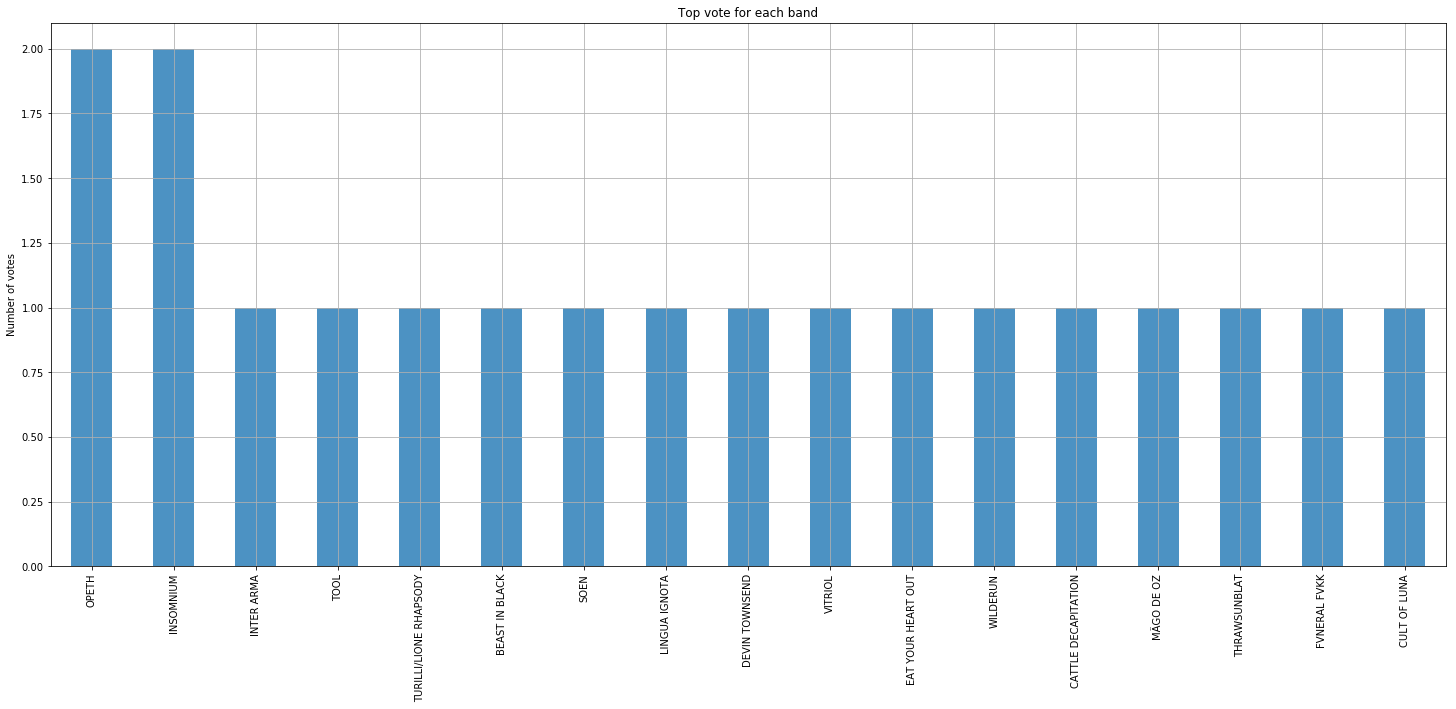

In [25]:
pylab.figure(figsize=(25,10))
band_count_list[1].plot('bar', alpha=0.8)

pylab.title('Top vote for each band')
pylab.ylabel('Number of votes')
pylab.grid()

## Lets look at how many votes each band got in total

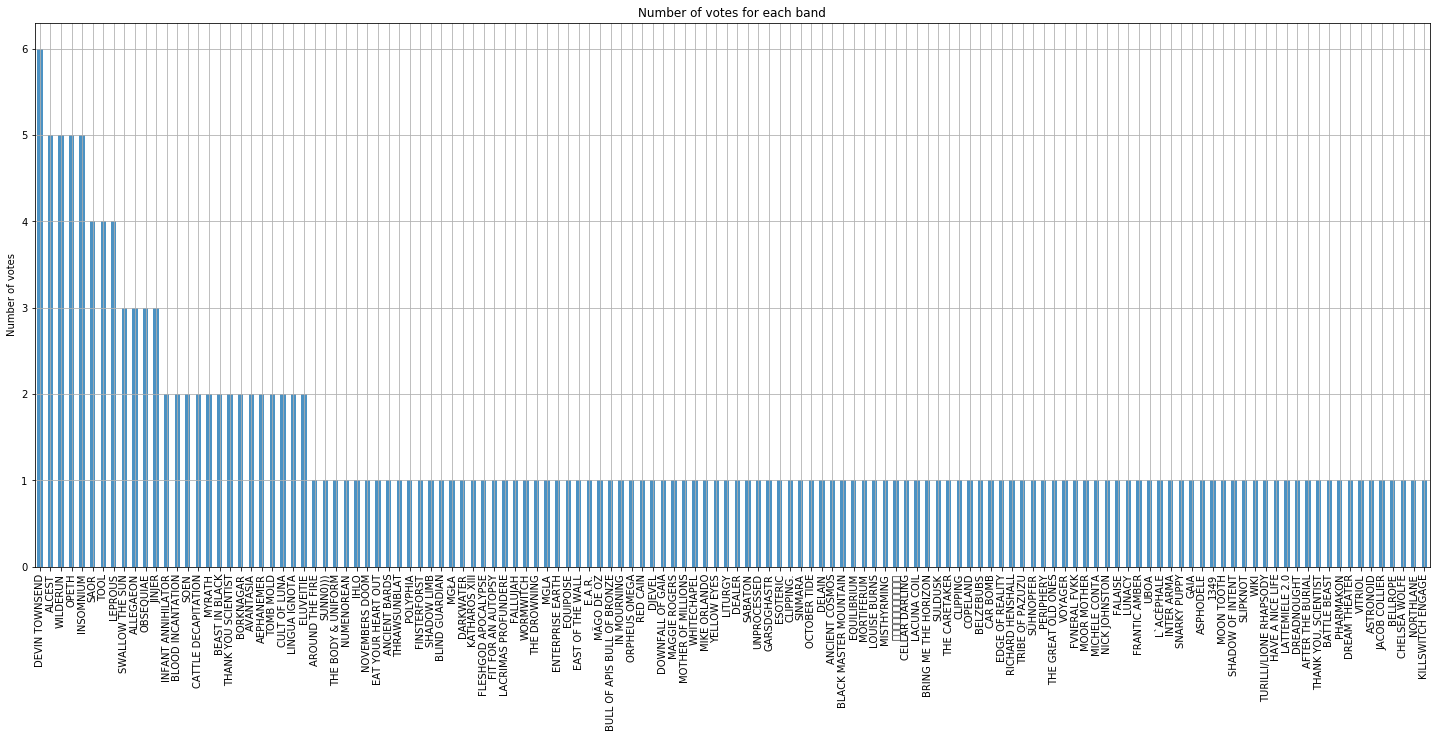

In [29]:

pylab.figure(figsize=(25,10))
stack = []   ## Merge all of the counts
for ii in range(band.shape[1]):
    for jj in range(band.shape[0]):
        stack.append(band[jj, ii])


pd.Series(stack).value_counts().plot('bar', alpha=0.8)

pylab.title('Number of votes for each band')
pylab.ylabel('Number of votes')
pylab.grid()

## And again for each album 

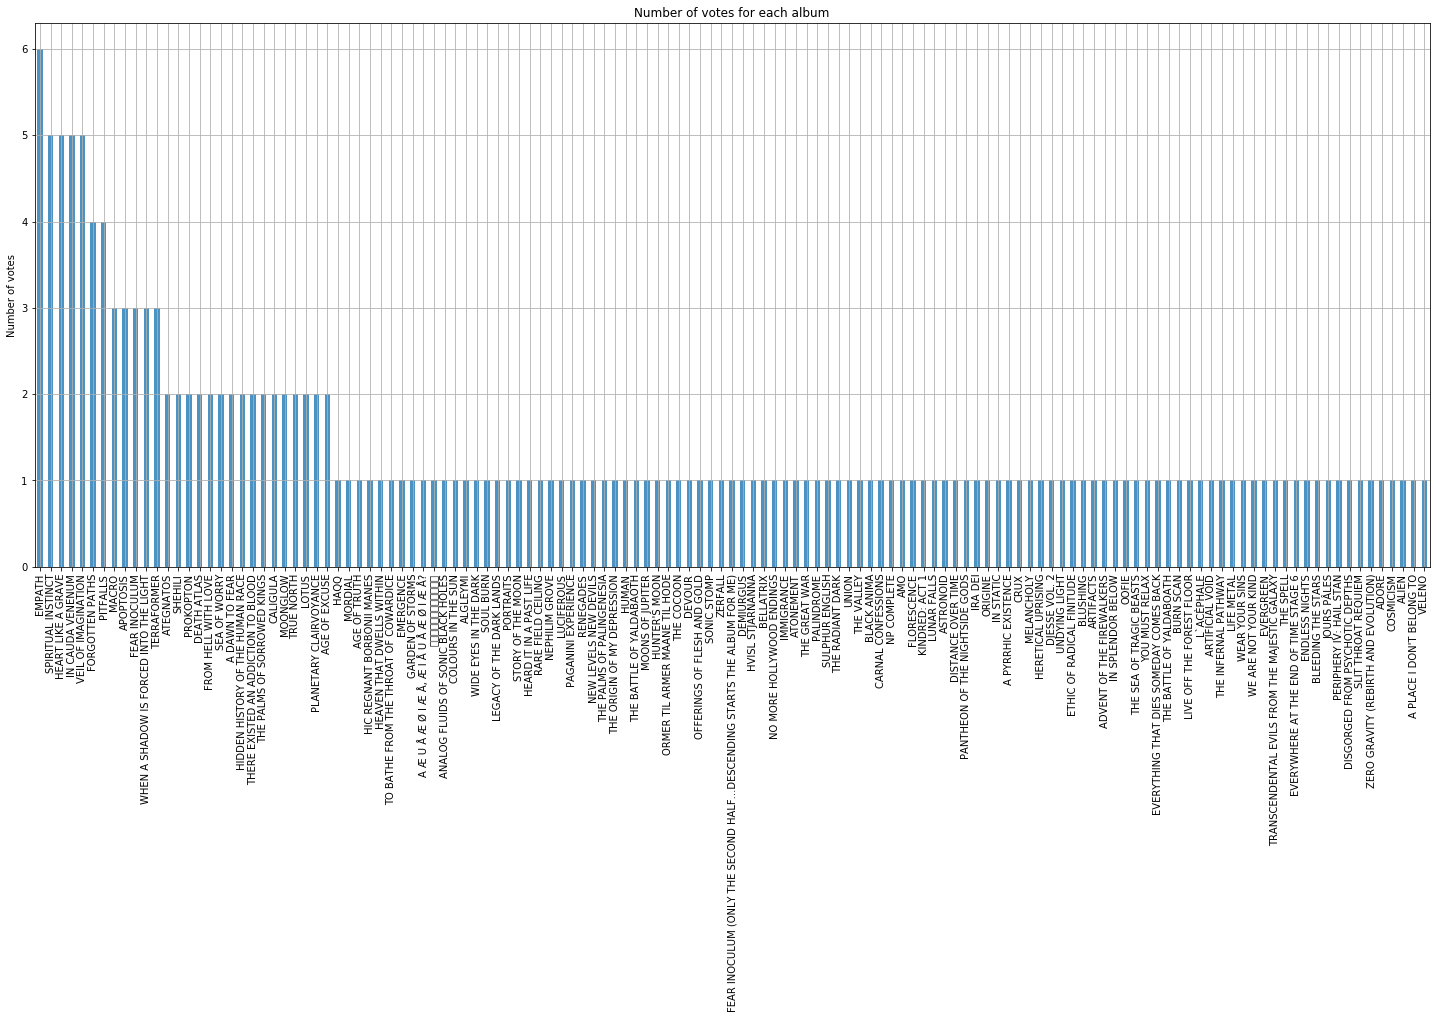

In [30]:
pylab.figure(figsize=(25,10))
stack = []
for ii in range(album.shape[1]):
    for jj in range(album.shape[0]):
        stack.append(album[jj, ii])


pd.Series(stack).value_counts().plot('bar', alpha=0.8)

pylab.title('Number of votes for each album')
pylab.ylabel('Number of votes')
pylab.grid()



##  Okay next we need to applay a score based on each voting tier.


## Now we do that for each voting tier 

%%HTML

<div class="alert alert-danger" role="alert">
  This is as far as I got.  Need to start adding up the scores next.  will finish tomorrow. 
</div>

In [11]:
# album_count_list = []

# for ii in range(album.shape[1] - 1):
#     print(ii)
#     album_count_list.append(pd.Series(album[1:, ii]).value_counts())

In [12]:
## quick look at a couple of them 

In [13]:
# album_count_list[1:4]

In [14]:
band_score_list = []

for ii, item in enumerate(band_count_list):
    print(ii)
    band_score_list.append(band_count_list[ii] * score[ii])
    
band_score_list
    

0
1
2
3
4
5
6
7
8
9
10


IndexError: index 10 is out of bounds for axis 0 with size 10

In [15]:
len(score)

10

In [16]:
a.values

NameError: name 'a' is not defined

In [17]:
a.keys()

NameError: name 'a' is not defined

In [18]:
#score = a.values * 10
# cumsum = {}
# for ii, item in enumerate(a.keys()):
#     cumsum[item]= a.values[ii] * 10




In [19]:
cumsum

NameError: name 'cumsum' is not defined

In [20]:
b.plot('bar', alpha=0.8)

pylab.title('Top vote for each band')
pylab.ylabel('Number of votes')
pylab.grid()

NameError: name 'b' is not defined

In [21]:
votes.shape

(20, 11)

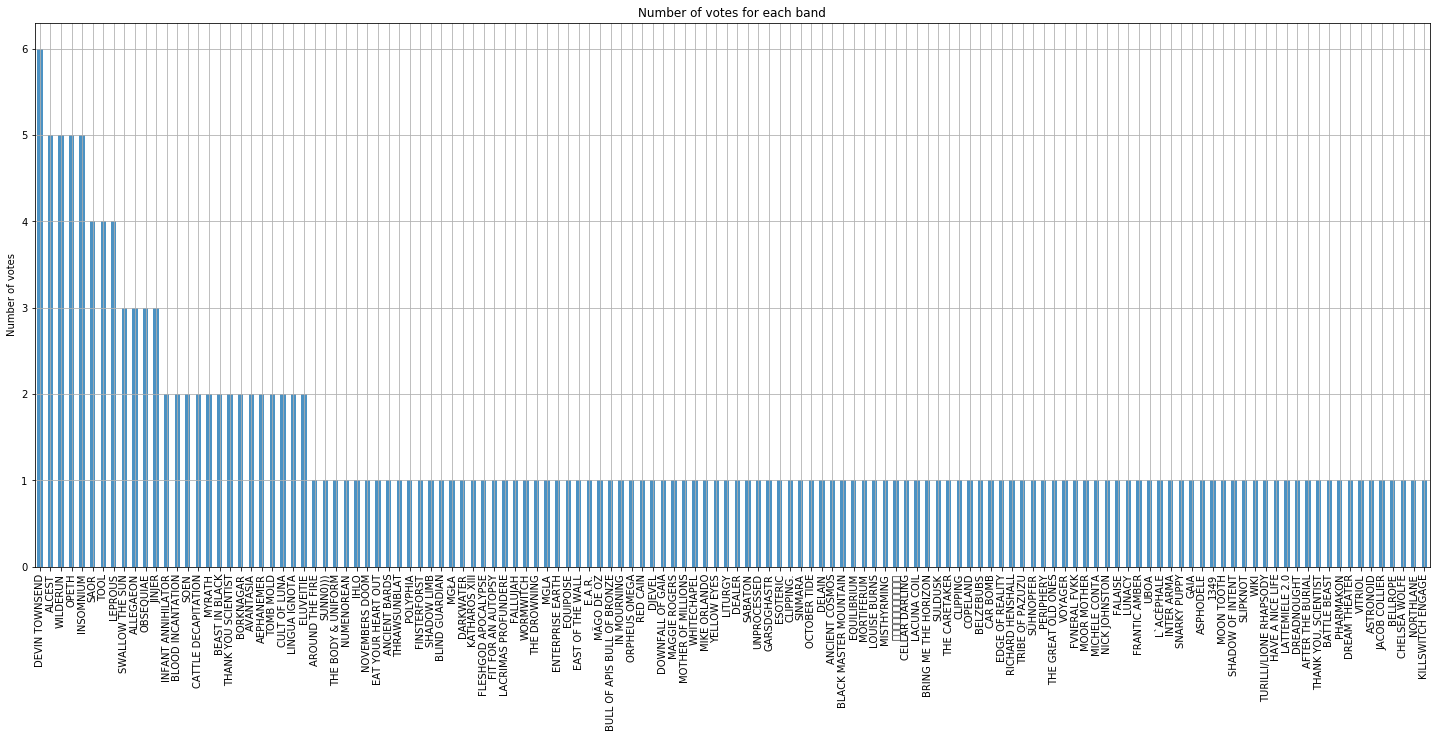

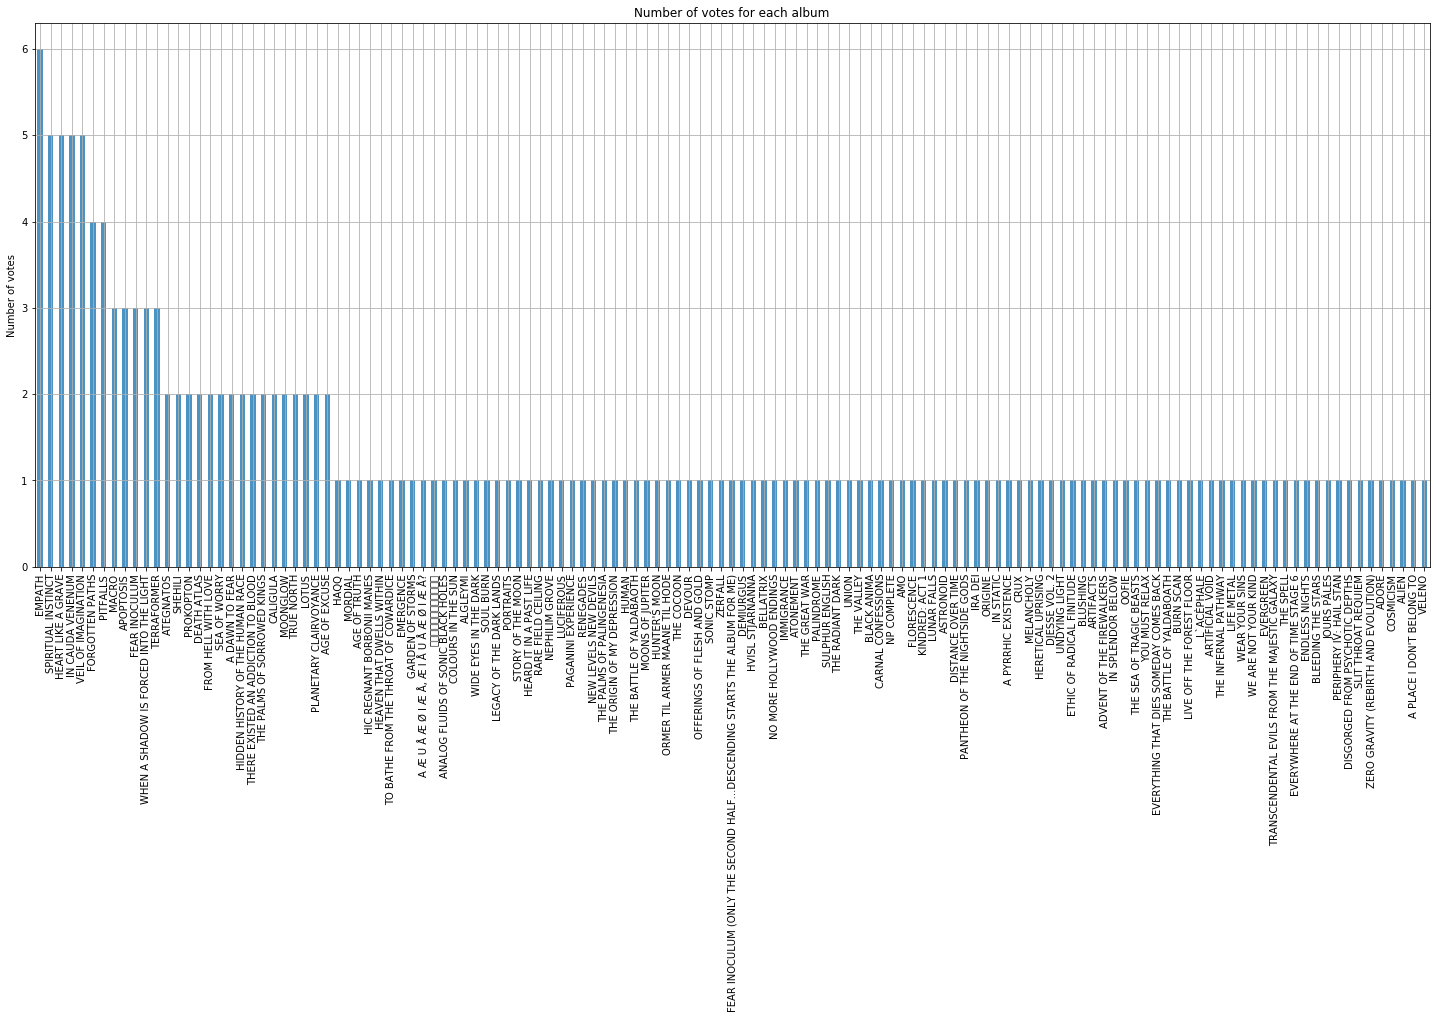

In [23]:
pylab.figure(figsize=(25,10))
stack = []
for ii in range(album.shape[1]):
    for jj in range(album.shape[0]):
        stack.append(album[jj, ii])


pd.Series(stack).value_counts().plot('bar', alpha=0.8)

pylab.title('Number of votes for each album')
pylab.ylabel('Number of votes')
pylab.grid()



## There are a few dupllicate becuase of typos.   We will attempt to fix that next